In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline

<ipython-input-71-43d7a88ab987>:36: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


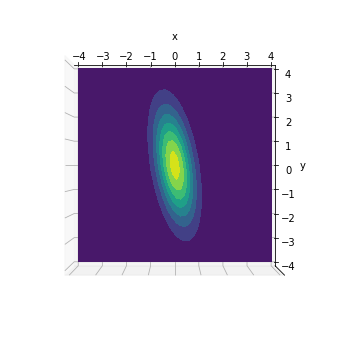

In [71]:
N = 50
X = np.linspace(-4, 4, N)
Y = np.linspace(-4, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0, 0])
sigma = np.array([[0.5**2 , 0], [-0.77**2, 2]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    N = np.sqrt((2*np.pi)**n * np.linalg.det(sigma))
    # This einsum call calculates (x-mu)T.sigma^-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, np.linalg.inv(sigma), pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(15,6))
ax = fig.gca(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')

#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.5, antialiased=True)
cset = ax.contourf(X, Y, Z, zdir='z', offset=0)

# Adjust the limits, ticks and view angle
ax.view_init(azim=-90, elev=90)
ax.set_zticks([])
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])

plt.show()
fig.savefig('multivariate_gaussian_example_6.png', bbox_inches='tight', transparent=True)